---

#Plotting the iris data with `matplotlib`

Description of the iris dataset: https://archive.ics.uci.edu/ml/datasets/iris
Let's load the iris data as a numpy array `iris`. The four columns are  'sepal_length', 'sepal_width', 'petal_length', and 'petal_width', correspondingly.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
from sklearn import datasets
iris = datasets.load_iris().data
print(type(iris))
print(iris.shape)

<class 'numpy.ndarray'>
(150, 4)


Now, we use `matplotlib` to plot the following figures.

---
**Task-1**: Draw four boxplots side by side, one for each column in the iris data.

Use `xticks` to set the labels as 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width'.

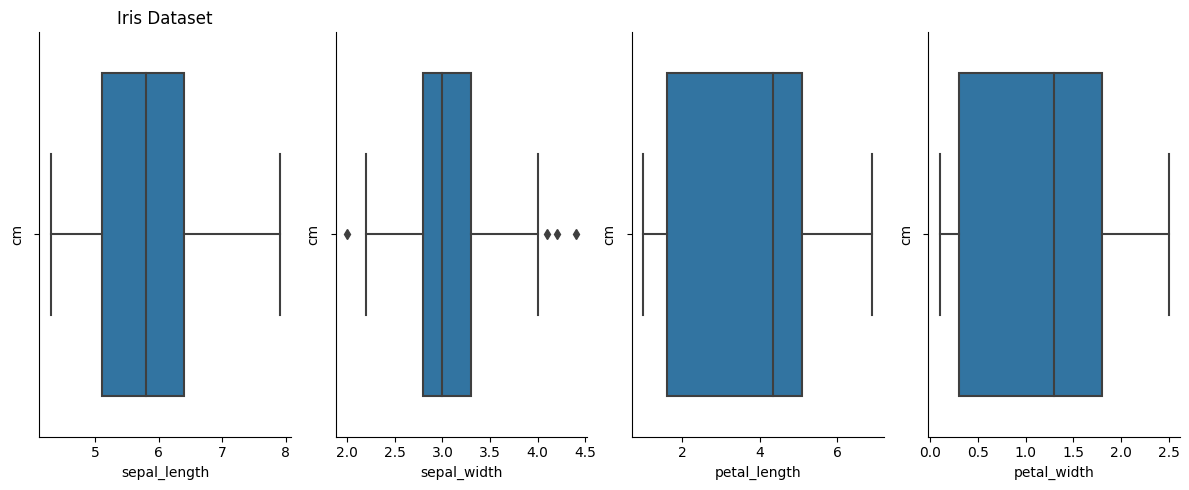

In [3]:
# ANSWER
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# loading the iris dataset
iris =load_iris()

# create a figure with four subplots
# figsize parameter sets the size of the figure
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))

# create four boxplot for each column
sns.boxplot(x=iris.data[:, 0], ax=axes[0])
sns.boxplot(x=iris.data[:, 1], ax=axes[1])
sns.boxplot(x=iris.data[:, 2], ax=axes[2])
sns.boxplot(x=iris.data[:, 3], ax=axes[3])

# set the axis label and title
axes[0].set(xlabel='sepal_length', ylabel='cm', title='Iris Dataset')
axes[1].set(xlabel='sepal_width',ylabel='cm')
axes[2].set(xlabel='petal_length',ylabel='cm')
axes[3].set(xlabel='petal_width',ylabel='cm')

# using function despine() to remove the top and right spines
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# adjusts the padding between subplots & save figure for future use
plt.tight_layout()
plt.savefig('iris_boxplots.png')


---
**Task-2**: Draw one histogram of every column in the iris data. Display them in a 2-by-2 layout. 


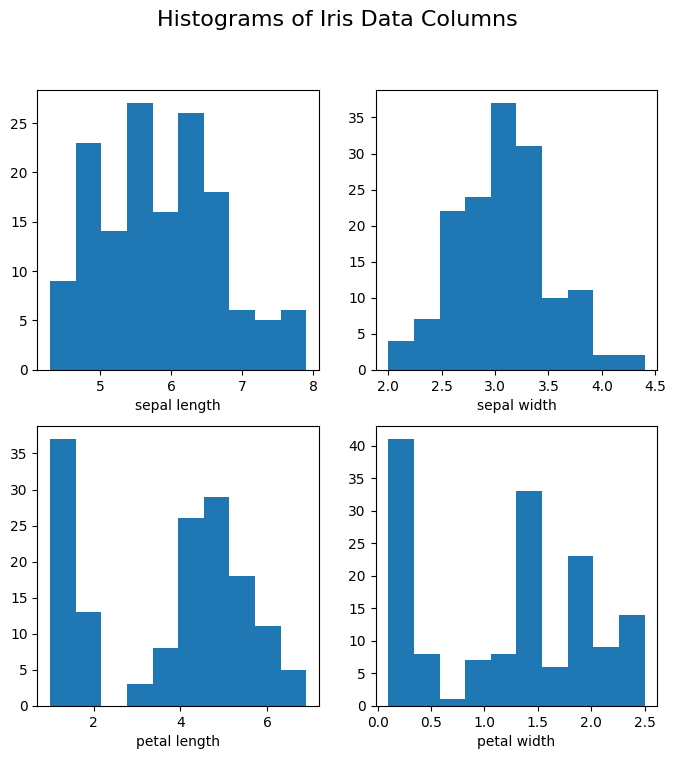

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data= load_iris().data

# Create a 2-by-2 layout of histograms
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Draw a histogram for each column of the iris data
axs[0, 0].hist(data[:, 0])
axs[0, 1].hist(data[:, 1])
axs[1, 0].hist(data[:, 2])
axs[1, 1].hist(data[:, 3])

# Set x-axis labels for each subplot
axs[0, 0].set_xlabel('sepal length')
axs[0, 1].set_xlabel('sepal width')
axs[1, 0].set_xlabel('petal length')
axs[1, 1].set_xlabel('petal width')

# Add a title to the figure
fig.suptitle('Histograms of Iris Data Columns', fontsize=16)

plt.show()


---
**Task-3** Suppose we assume that the `sepal_width` variable follows a Normal distribution. Estimate the mean and standard deviation using `np.mean()` and `np.std()`.

Plot the estimated normal curve in red color on top of the histogram of `sepal_width`.



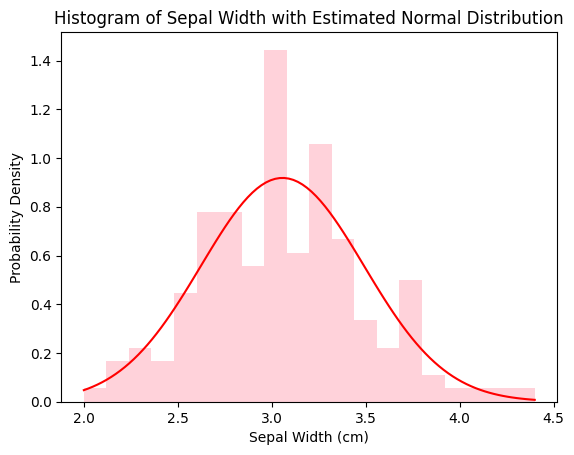

In [5]:
# ANSWER
from scipy.stats import norm
from sklearn.datasets import load_iris

# loads the iris dataset from scikit-learn's datasets module
data = load_iris().data
sepal_width = data[:, 1]

# Estimate mean and standard deviation of sepal_width
mu = np.mean(sepal_width)
sigma = np.std(sepal_width)

# generates a plot that displays the distribution of sepal_width
# density=True means the plot shows a probability density instead of frequency count
plt.hist(sepal_width, bins=20, density=True, alpha=0.7, color='pink')

# Plot estimated normal distribution in red
x = np.linspace(min(sepal_width), max(sepal_width), 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, color='red')

#Add proper axis labels, and title.
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Probability Density')
plt.title('Histogram of Sepal Width with Estimated Normal Distribution')

# Display the plot
plt.show()


---
# &diams; Question 3: Optimization [20 pts]

(a) Use `matplotlib` to plot the function over the interval [-3, 3]. 
$$f(x) = sin^2(x − 2)e^{−x^2}$$
Add proper axis labels, a title, etc.

**Hint**: Use `numpy.sin()` and `numpy.exp()`




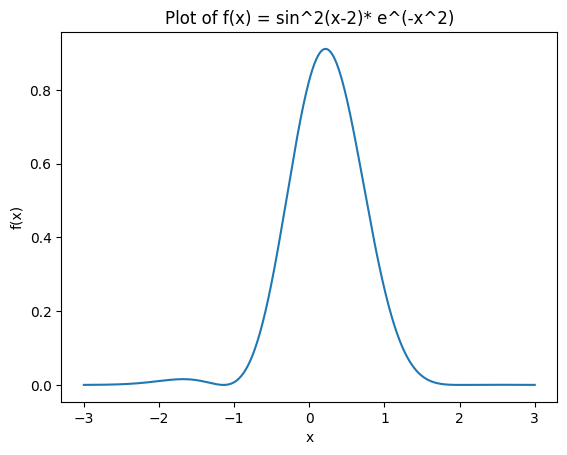

In [6]:
# ANSWER 
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sin(x - 2)**2 * np.exp(-x**2)

# Create an array of x values and corresponding y values
x= np.linspace(-3, 3, 500)
y= f(x)

# Create the plot
# x-axis is labeled "x", the y-axis is labeled "f(x)"
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sin^2(x-2)* e^(-x^2)')

# Display the plot
plt.show()


---
(b) Find the maximum of the function.

**Hint**: 1) Maximizing a function f(x) is equivalent to minimizing -f(x); 2) Use `scipy.optimize.minimize()`.

The expected results is 0.21624139


In [7]:
# ANSWER 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function f(x)
def f(x):
    return np.sin(x - 2)**2 * np.exp(-x**2)


#function neg_f(x) defined here is the negative of the function f(x)
def neg_f(x):
    return -f(x)

# Find the maximum of the function
res = minimize(neg_f, x0=0)
max_val = -res.fun
max_x = res.x

print("The maximum of the function will be {} at x = {}".format(max_val, max_x))


The maximum of the function will be 0.9116854118471545 at x = [0.21624132]


# 
(c) Draw the function again and highlight the maximal point as a green circle.

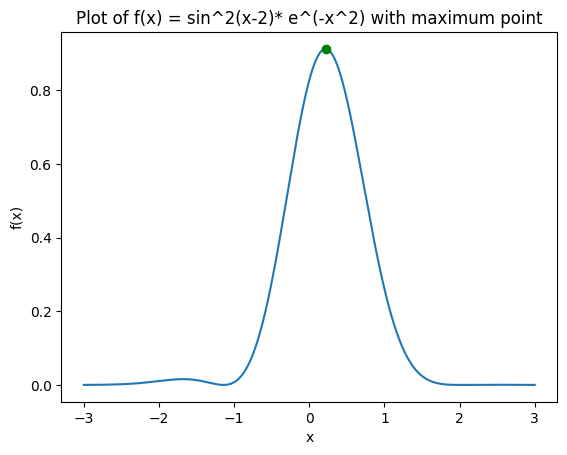

In [8]:
# ANSWER 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Define the function f(x)
def f(x):
    return np.sin(x - 2)**2 * np.exp(-x**2)

# Define the negative of the function f(x) to minimize
def neg_f(x):
    return -f(x)

# Find the maximum point of f(x)
res = minimize(neg_f, x0=0)
x_max = res.x[0]
y_max = f(x_max)

# Create an array of x values and corresponding y values
x = np.linspace(-3, 3, 500)
y = f(x)

# Create the plot
plt.plot(x, y)
plt.plot(x_max, y_max, 'o', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = sin^2(x-2)* e^(-x^2) with maximum point')

# Display the plot
plt.show()


---
# &diams; Question 4: Simulation of least squares regression [40 pts]

(a) Sample generation

Write your own code to simulate 100 data points from the following model.

$$X \sim Uniform(A=-2, B=2)$$
$$\epsilon \sim N(\mu=0,\sigma=2)$$
$$Y=2+3X+\epsilon$$

**Hint**: Use `numpy.random.uniform()` and `numpy.random.normal()`.

Using the random seed of 206 (for both $X$ and $\epsilon$), you are expected to get the following numpy arrays:

`X = [-0.29070303 -0.06043533 ... -0.4816969   0.91843692]`

`Y = [3.44303672e-03 -3.59006976e+00 ... 1.80521284e+00  4.29317228e+00]`

In [9]:
# ANSWER

# Set random seed
np.random.seed(206)

# Define the parameters
A = -2
B = 2
mu = 0
sigma = 2

# Simulate X and epsilon
X = np.random.uniform(low=A, high=B, size=100)
epsilon = np.random.normal(loc=mu, scale=sigma, size=100)
Y = 2 + 3*X + epsilon

# Show the output
print("X = ", X)
print("Y = ", Y)



X =  [-0.29070303 -0.06043533 -1.81709475  0.32683111  1.53961992  0.49524875
 -1.31241543  0.67385421 -0.19299883 -0.98045583  1.74360943 -0.13812515
 -0.68456544 -1.07433566 -1.936836   -1.21122123  1.0170794  -0.79484008
  0.76725838  0.26102679 -0.96156805 -0.09402309  0.69927132 -0.21775251
 -0.96307019 -0.82063594 -0.18100144 -1.03360105 -0.5730787   0.06615195
  0.69818066 -1.25395841  0.39789342 -0.95123259 -0.07757703  0.55089312
 -0.11134398 -1.75473383  1.13809499 -1.40453244 -1.28934016  1.30193963
  0.37444165 -1.1983074  -1.10321718 -1.58419396  0.69711125  0.70972631
  1.61551519 -1.25248443  1.72443798 -1.08793687 -1.40319653 -0.18621993
  0.12253961 -0.55966455  1.51140075  0.07659723  0.02409268  1.17430842
 -0.0108159   0.63226256  1.82390846 -0.31826676  0.24709254  0.33804986
 -1.73956433  1.41073356 -0.91043132 -0.42113416 -1.00323411 -1.93420904
  0.72679598  1.42029043 -0.51803233 -0.88138825  0.73563052  0.89098867
  1.39825513  0.80093018 -1.21079472  1.874347

---
(b) Use `matplotlib` to draw a scatter plot of the 100 data points $(x_0, y_0), \cdots, (x_{100}, y_{100})$. Add the polulation regression line $Y=2+3X$ in red color.

Add proper axis labels, a title, etc.

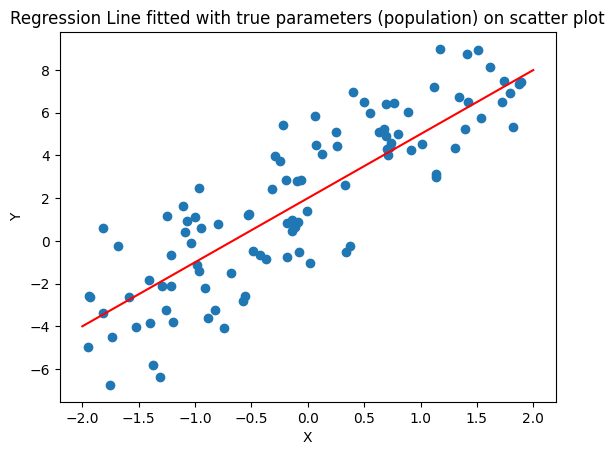

In [10]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(206)

# Generate the data
X = np.random.uniform(-2, 2, 100)
eps = np.random.normal(0, 2, 100)
Y = 2 + 3*X + eps

# Calculate the population regression line
#creates an array of 100 evenly spaced X values from -2 to 2
# calculating corresponding values of Y using the equation Y= 2 + 3*X
X_line = np.linspace(-2, 2, 100)
Y_line = 2 + 3*X_line

# Create scatter plot
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line fitted with true parameters (population) on scatter plot')

#show the scatterplot
plt.show()


---
(c) Use `scipy.optimize.curve_fit()` to fit a least squares regression $Y = \beta_0 + \beta_1 X$ to the simulated data.

The expected estimates are $\hat{\beta_0}$=1.8914943777278204 and $\hat{\beta_1}$=2.87327463881861.


In [11]:
# ANSWER
import numpy as np
from scipy.optimize import curve_fit

# Simulated data
np.random.seed(206) #setting random seed
X = np.random.uniform(-2, 2, 100) #generate 100 random values between -2 and 2
epsilon = np.random.normal(0, 2, 100) #100 normally distributed random errors,mean=0 & st. dev=2
Y = 2 + 3*X + epsilon #generate the response variable

# Define the linear regression function
def lin_reg(x, b0, b1):
    return b0 + b1*x

# Fit the linear regression model
params, cov = curve_fit(lin_reg, X, Y)

# Extract the coefficients
b0 = params[0]
b1 = params[1]

# Print the coefficients
print("b0 is", b0)
print("b1 is", b1)



b0 is 2.1369304050960203
b1 is 3.1525736646811593


---
(d) Luckily, we have the analytical solution of the least squares regression $Y = \beta_0 + \beta_1 X + \epsilon$, which is

$$ 
\begin{aligned}
 \hat{\beta_1} & = 
 \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
 {\sum_{i=1}^{n} (x_i - \bar{x})^2} \\
 \hat{\beta_0} & = \bar{y} - \hat{\beta_1} \bar{x}
\end{aligned} 
$$

Write your own code to calculate $\hat{\beta_0}$ and $\hat{\beta_1}$ using the above equations. Compare your results with the coefficients calculated by the `scipy.optimize.curve_fit()` function in part (c). Are they the same?

The expected results are $\hat{\beta_0}$=1.8914943756627591 and $\hat{\beta_1}$=2.8732746405232445.

In [12]:
# ANSWER
# calculate the mean of X and Y 
x_bar = np.mean(X)
y_bar = np.mean(Y)

#calculate the estimated slope of the regression line
beta1_hat= np.sum((X - x_bar) * (Y - y_bar)) / np.sum((X- x_bar)**2)
beta0_hat= y_bar - beta1_hat *x_bar
print("beta0_hat:", beta0_hat)
print("beta1_hat:", beta1_hat)


beta0_hat: 2.1369304017488027
beta1_hat: 3.1525736571448437


The coefficients calculated using the analytical solution are close enough to the coefficients calculated by the curve_fit() function in part (c).

---
(e) Redraw a scatter plot of the 100 data points $(x_0, y_0), \cdots, (x_{100}, y_{100})$. Add the polulation regression line $Y=2+3X$ in red color. Add the least squares fitted line, using the coefficients estimated in part (d), in blue color.

Add proper axis labels, a title, etc.

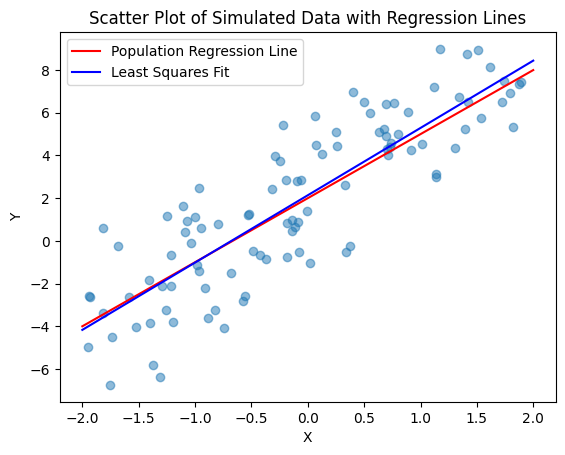

In [13]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(206)
X = np.random.uniform(-2, 2, size=100)
eps = np.random.normal(0, 2, size=100)
Y = 2 + 3 * X + eps

# Calculating mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calculating analytical solution of least squares regression
b1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
b0 = y_mean - b1 * x_mean

# Creating array of X values for regression lines
x_reg = np.array([-2, 2])

# Calculating values for population regression line
# assuming the intercept of the population regression line is 2 and slope is 3
y_pop_reg = 2 +3 * x_reg

# Calculate values for least squares fitted line
y_fit_reg =b0 + b1 * x_reg

# Create the scatter plot
plt.scatter(X, Y, alpha=0.5)

# Add the population regression line
plt.plot(x_reg, y_pop_reg, c='red', label='Population Regression Line')

# Add the least squares fitted line
plt.plot(x_reg, y_fit_reg, c='blue', label='Least Squares Fit')

# Add axis labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Simulated Data with Regression Lines')

# Add a legend
plt.legend()

# Show the plot
plt.show()


---
(f) Recall in part (a), we set the random seed to be 206. 
This time, without fixing the random seeds, repeat the simulation 10 times and draw the 10 least sqaure regression lines (one for each simulation) on the same plot. Also, add the polulation regression line  $𝑌=2+3𝑋$  in red color. Note that you do not need to draw the individual data points.

Add proper axis labels, a title, etc.

<ipython-input-14-934c920e77ce>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


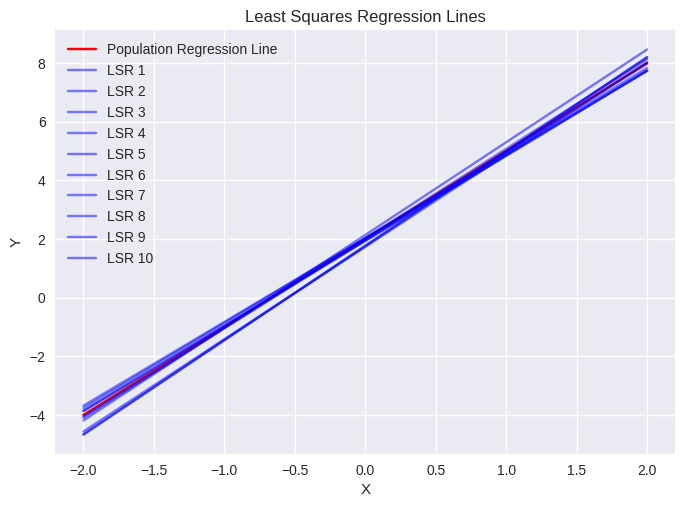

In [14]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# firstly, lets define the true parameters for the population model
beta0= 2
beta1= 3

# now the number of data points
n =100

# the range of X
X_min =-2
X_max = 2

# the standard deviation of the noise
sigma = 2

# now define the function to create data
def generate_data(n, X_min, X_max, beta0, beta1, sigma):
    X = np.random.uniform(X_min, X_max, size=n)
    eps = np.random.normal(loc=0, scale=sigma, size=n)
    Y = beta0+ beta1 * X+ eps
    return X, Y

#function to calculate the least squares estimates of beta0 and beta1 is defined
def least_squares_estimate(X, Y):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    beta1_hat = np.sum((X - x_bar) * (Y - y_bar))/ np.sum((X - x_bar)**2)
    beta0_hat = y_bar- beta1_hat * x_bar
    return beta0_hat, beta1_hat

# Set the plot style to give a modern and clean look to the plots. 
plt.style.use('seaborn')

# Create an array of x values for the regression lines
x_reg = np.linspace(X_min, X_max, num=100)

# plot the population regression line with red color
plt.plot(x_reg, beta0 + beta1 * x_reg, 'r-', label='Population Regression Line')

# Plot the least squares regression lines with blue color
for i in range(10):
    X,Y = generate_data(n, X_min, X_max, beta0, beta1, sigma)
    beta0_hat, beta1_hat = least_squares_estimate(X,Y)
    plt.plot(x_reg, beta0_hat + beta1_hat * x_reg, 'b-', alpha=0.5, label=f'LSR {i+1}')

# Label axis and write title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Regression Lines')

# legend addition
plt.legend()

# Show the plot
plt.show()
